In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io, color, img_as_bool, exposure, transform, feature
%matplotlib inline

In [3]:
# file paths
ci_path = '/Volumes/Samsung_T3/machinelearning/data/plane_data/cropped_images_18/'
l_file = '/Volumes/Samsung_T3/machinelearning/data/plane_data/plane_labels_2018.csv'
sandbox = '/Volumes/Samsung_T3/project-repos/cv_ml/scikit-image/sandbox/'

In [5]:
# all labels
plane_data = pd.read_csv(l_file)
print(plane_data.head())
print(plane_data.shape)

                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
(6758, 2)


In [6]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [7]:
# take a random subset of 20 of the airplane images
aircraft_subset = aircraft.sample(20)
print(aircraft_subset.shape)

(20, 2)


### Image Extraction

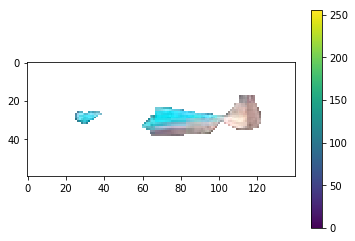

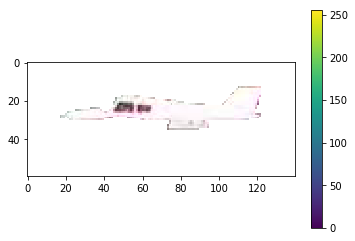

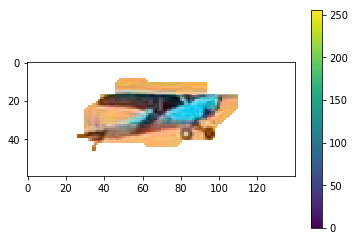

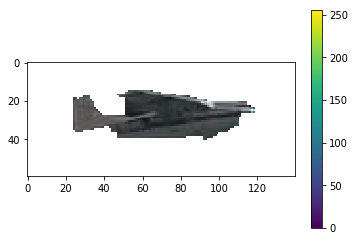

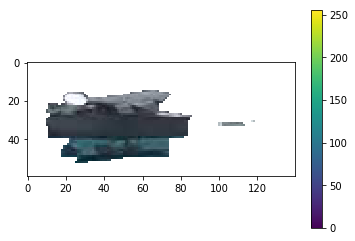

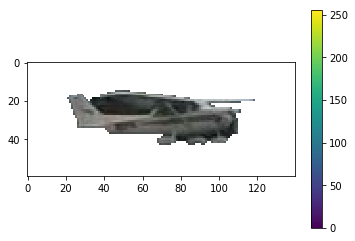

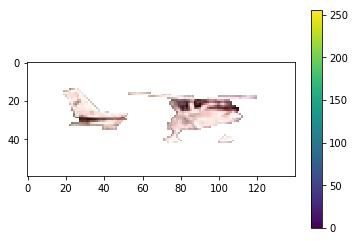

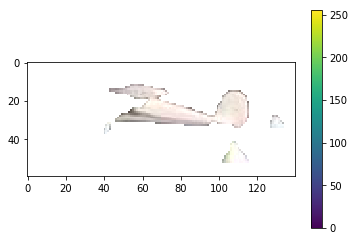

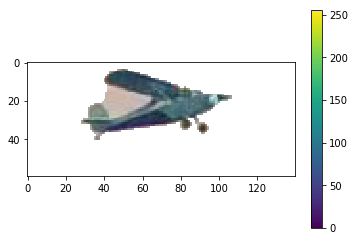

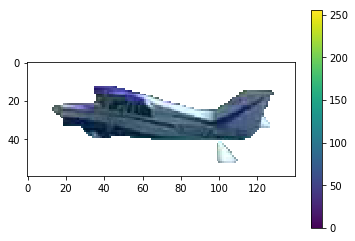

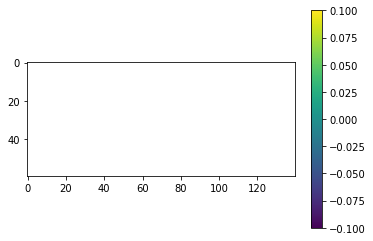

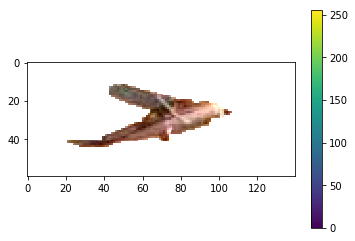

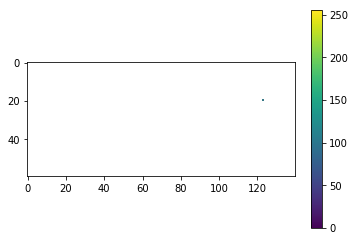

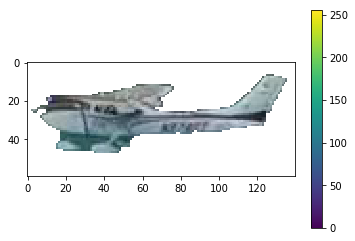

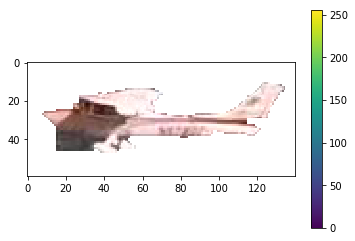

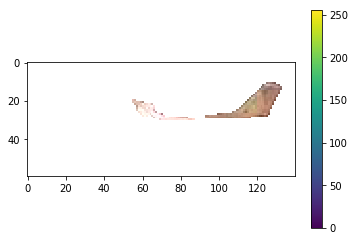

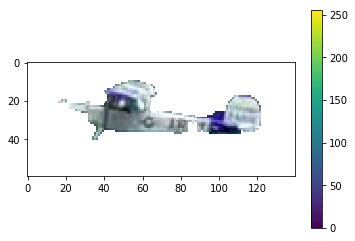

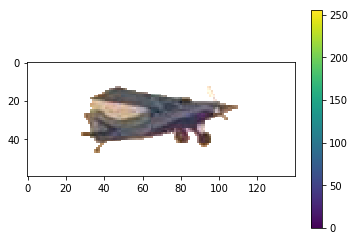

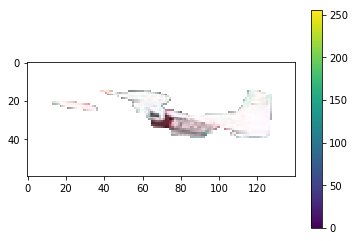

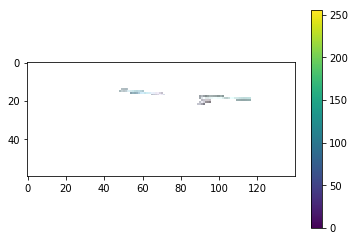

In [117]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import util 
from skimage import data, exposure, img_as_float
from skimage.feature import canny
from scipy import ndimage as ndi
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
import cv2 as cv

# for each of the subset images, alter them and view the alterations
f = open(sandbox + "view_images.html","w") 
first_image = False

for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
#     img_raw = io.imread(imname)
# #     final_image = img_as_bool(img_raw) 
#     final_image = color.rgb2gray(img_raw)
#     image = final_image
    
    image = cv.imread(imname)
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    height, width = image.shape[:2]
    rect = (1,1,width-5,height-5)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    image = image*mask2[:,:,np.newaxis]
    
    tmp = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _,alpha = cv.threshold(tmp,0,255,cv.THRESH_BINARY)
    b, g, r = cv.split(image)
    rgba = [b,g,r, alpha]
    image = cv.merge(rgba,4)
    
    plt.imshow(image),plt.colorbar(),plt.show()

f.close() 


### Edge Detection (Roberts, Sobel, Prewitt, Scharr)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


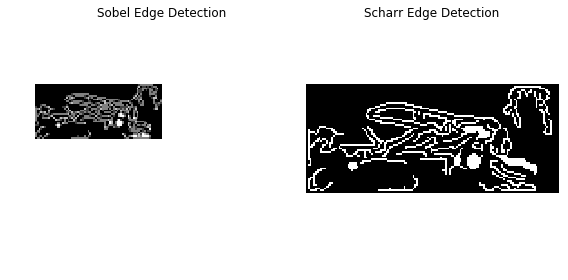

(60, 140)
[[ 0.68041529  0.67844314  0.67844314 ...,  0.34508667  0.33332196
   0.42968667]
 [ 0.68041529  0.67844314  0.67844314 ...,  0.34900824  0.30979255
   0.36694157]
 [ 0.67844314  0.67844314  0.67844314 ...,  0.35572824  0.31259098
   0.35069765]
 ..., 
 [ 0.31153176  0.35859059  0.35466902 ...,  0.13282824  0.13282824
   0.1367498 ]
 [ 0.36475216  0.39220314  0.36083059 ...,  0.13282824  0.13282824
   0.1367498 ]
 [ 0.34514431  0.33730118  0.28632078 ...,  0.13282824  0.13282824
   0.1367498 ]]


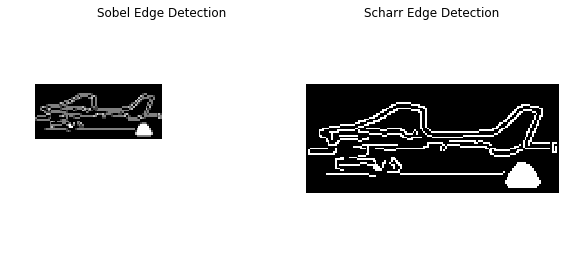

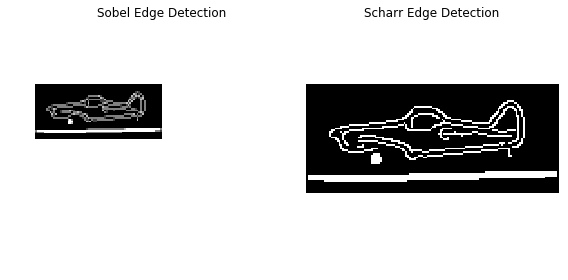

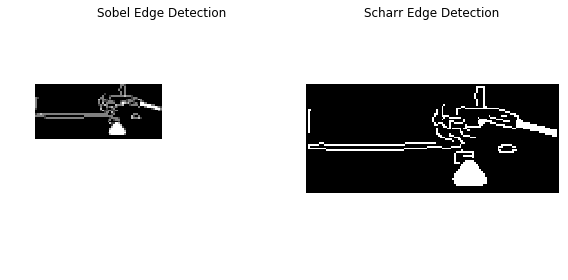

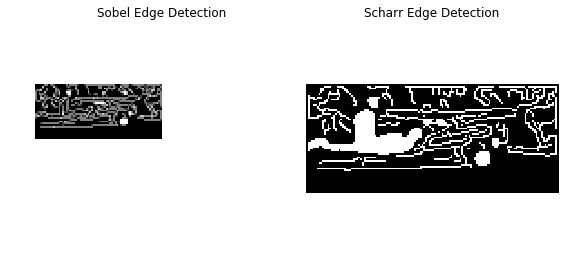

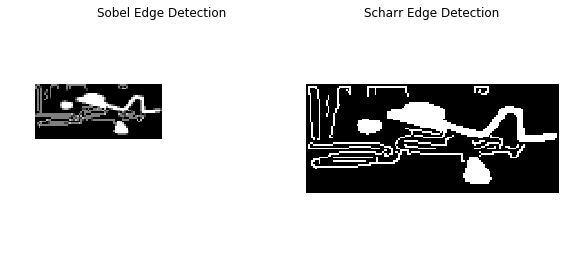

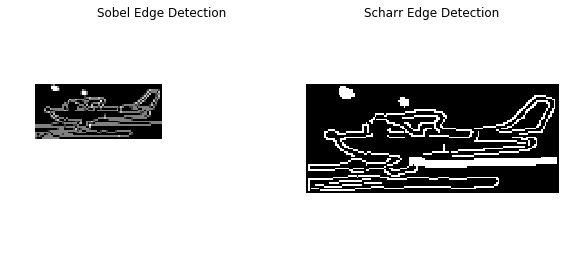

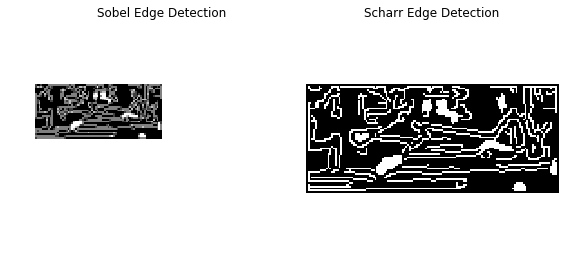

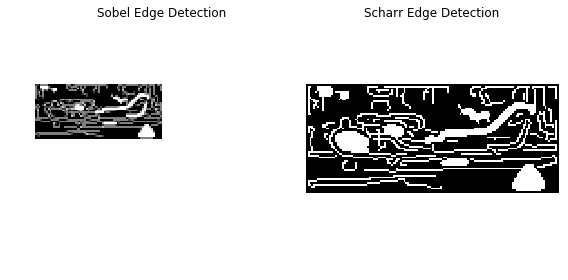

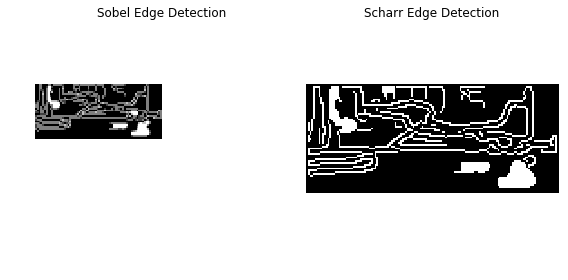

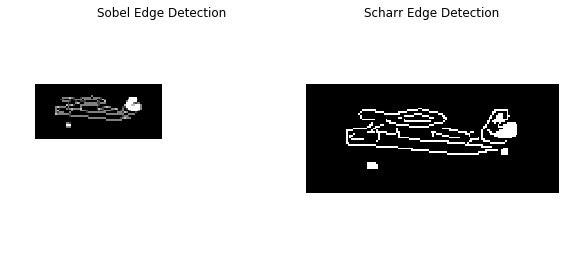

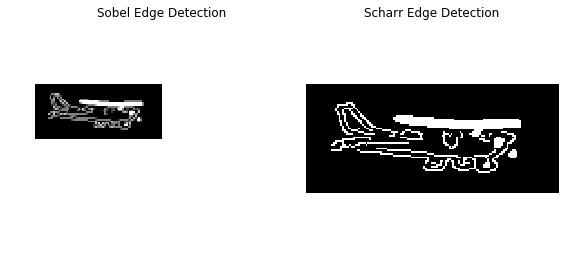

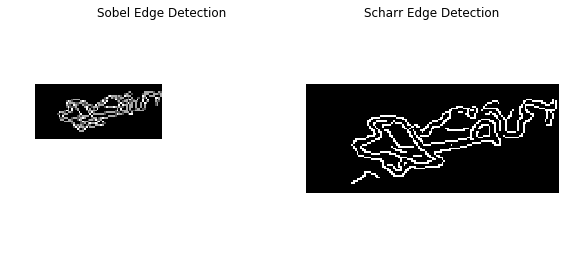

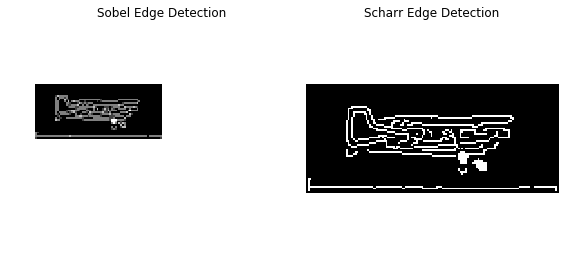

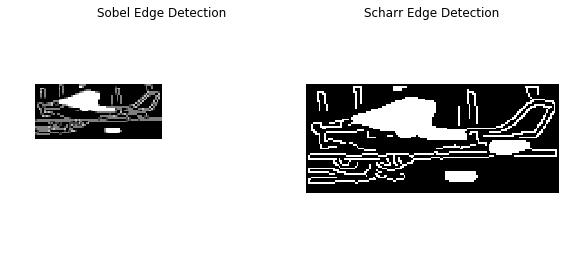

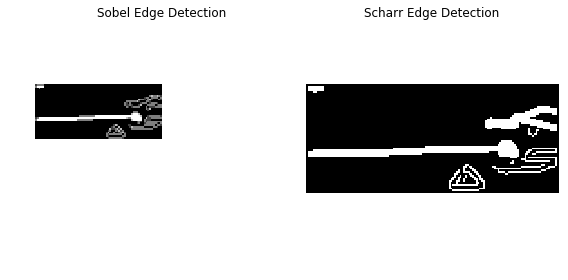

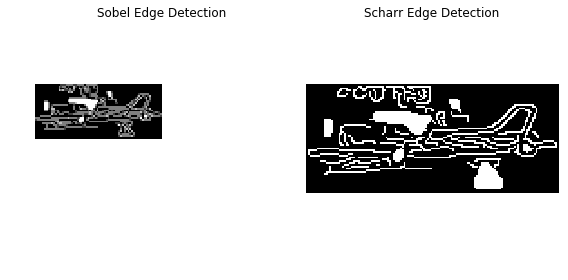

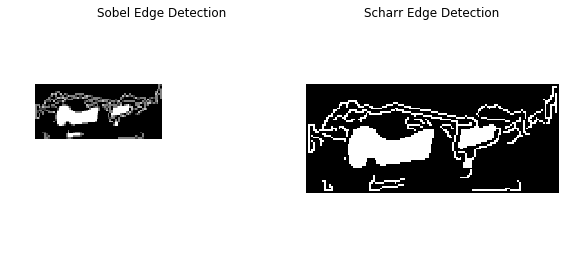

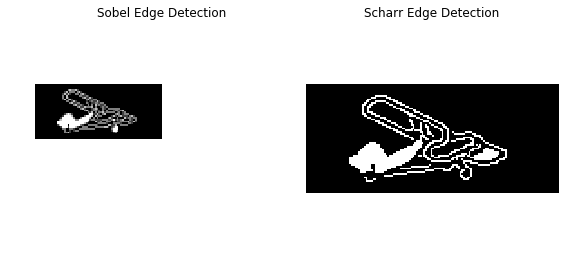

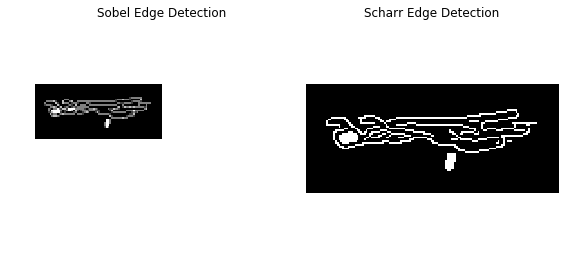

In [12]:
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import util 
from skimage import data, exposure, img_as_float
from skimage.feature import canny
from scipy import ndimage as ndi
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
import cv2 as cv

# for each of the subset images, alter them and view the alterations
f = open(sandbox + "view_images.html","w") 
first_image = False

for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
#     final_image = img_as_bool(img_raw) 
    final_image = color.rgb2gray(img_raw)
    image = final_image

    edge_roberts = roberts(image)
    edge_sobel = sobel(image)
    edge_prewitt = prewitt(image)
    edge_scharr = scharr(image)
    
#     edge_roberts = util.invert(edge_roberts)
#     edge_sobel = util.invert(edge_sobel)
#     edge_prewitt = util.invert(edge_prewitt)
#     edge_scharr = util.invert(edge_scharr)
    
#     edge_roberts = exposure.equalize_hist(edge_roberts, nbins=2)
#     edge_sobel = exposure.equalize_hist(edge_sobel, nbins=2)
#     edge_prewitt = exposure.equalize_hist(edge_prewitt, nbins=2)
#     edge_scharr = exposure.equalize_hist(edge_scharr, nbins=2)
    
    edge_roberts = canny(edge_roberts)
    edge_sobel = canny(edge_sobel)
    edge_prewitt = canny(edge_prewitt)
    edge_scharr = canny(edge_scharr)
    
    edge_roberts = ndi.binary_fill_holes(edge_roberts)
    edge_sobel = ndi.binary_fill_holes(edge_sobel)
    edge_prewitt = ndi.binary_fill_holes(edge_prewitt)
    edge_scharr = ndi.binary_fill_holes(edge_scharr)
    
    edge_sobel = rescale(edge_sobel, 1.0 / 2.0)
      
    fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                           figsize=(8, 4))
#     ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
#     ax[0].set_title('Roberts Edge Detection')
    ax[0].imshow(edge_sobel, cmap=plt.cm.gray)
    ax[0].set_title('Sobel Edge Detection')
#     ax[0].imshow(edge_prewitt, cmap=plt.cm.gray)
#     ax[0].set_title('Prewitt Edge Detection')
    ax[1].imshow(edge_scharr, cmap=plt.cm.gray)
    ax[1].set_title('Scharr Edge Detection')
    for a in ax:
        a.axis('off')
    plt.tight_layout()
    plt.show()
    
    im = sandbox + row['img_name'] + '.png'
    plt.imsave(im, edge_sobel)
    if first_image==False:
        print(image.shape)
        print(image)
        first_image = True
    f.write("<img src='" + row['img_name'] + ".png' width='320'>\n")

f.close() 
